In [10]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [19]:
#Set up training data
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-4, 14, 32, 46, 59, 72, 100], dtype=float)

In [9]:
for i, c in enumerate(celsius_q):
    print('{} degrees Celsius = {} degrees Fahrenheit'.format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -4.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 7.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [73]:
# Create a model
# build a layer
IO0 = tf.keras.layers.Dense(units=1)
IO1 = tf.keras.layers.Dense(units=1, input_shape=[1])

# input_shape=[1] The input is a single value. a one dimensional array with one member
# units=1 the number of nodes in the layer 

# assemble them into a model
model = tf.keras.Sequential([IO1])

model_alternative = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [74]:
# compile the model - pick the loss and optimizer.  
# The loss is the error to reduce. 
# measures how good or bad the model is during each iteration is called the “loss function”, 
# and the goal of each nudge is to “minimize the loss function.” 
# the optimizer is the method that controls the variables to reduce the error.
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [75]:
# train the model 
#  - relying the loss, the optimizer fits all internal variables to produce the best model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


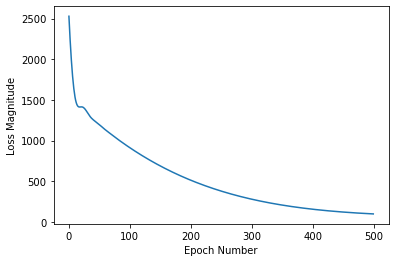

In [76]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [77]:
# Use the model to predict values 
print(model.predict([100.0]))

[[175.1759]]


In [78]:
print(model.predict([19.0]))

[[59.986935]]


In [79]:
# Looking at the layer weights
print("These are the layer1 variables: {}".format(IO1.get_weights()))
#print("These are the layer2 variables: {}".format(IO2.get_weights()))

These are the layer1 variables: [array([[1.422086]], dtype=float32), array([32.9673], dtype=float32)]


In [80]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[176.11247]]
Model predicts that 100 degrees Celsius is: [[176.11247]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.24511307, -0.02079323,  0.00871914,  0.347309  ]],
      dtype=float32), array([ 3.1975944, -3.0150805, -2.0298138,  3.1692195], dtype=float32)]
These are the l1 variables: [array([[ 0.39248532, -0.5035023 , -0.9381405 ,  0.5039144 ],
       [-0.27460754,  1.0982698 ,  0.24557939, -0.31671646],
       [ 0.51465493,  0.71939623, -0.27022237, -0.6812505 ],
       [ 1.0119903 , -0.10084184, -0.6132851 ,  0.17450012]],
      dtype=float32), array([ 3.0343602, -3.3105776, -3.2659626,  3.246304 ], dtype=float32)]
These are the l2 variables: [array([[ 0.91095644],
       [-0.9388275 ],
       [-1.2605265 ],
       [ 1.1952288 ]], dtype=float32), array([3.23068], dtype=float32)]


In [81]:
print(model.predict([19.0]))

[[65.1428]]


## MODEL.FIT()
>* tuning the internal variables of the networks to the best possible values
>* The optimization process is called Gradient Descent
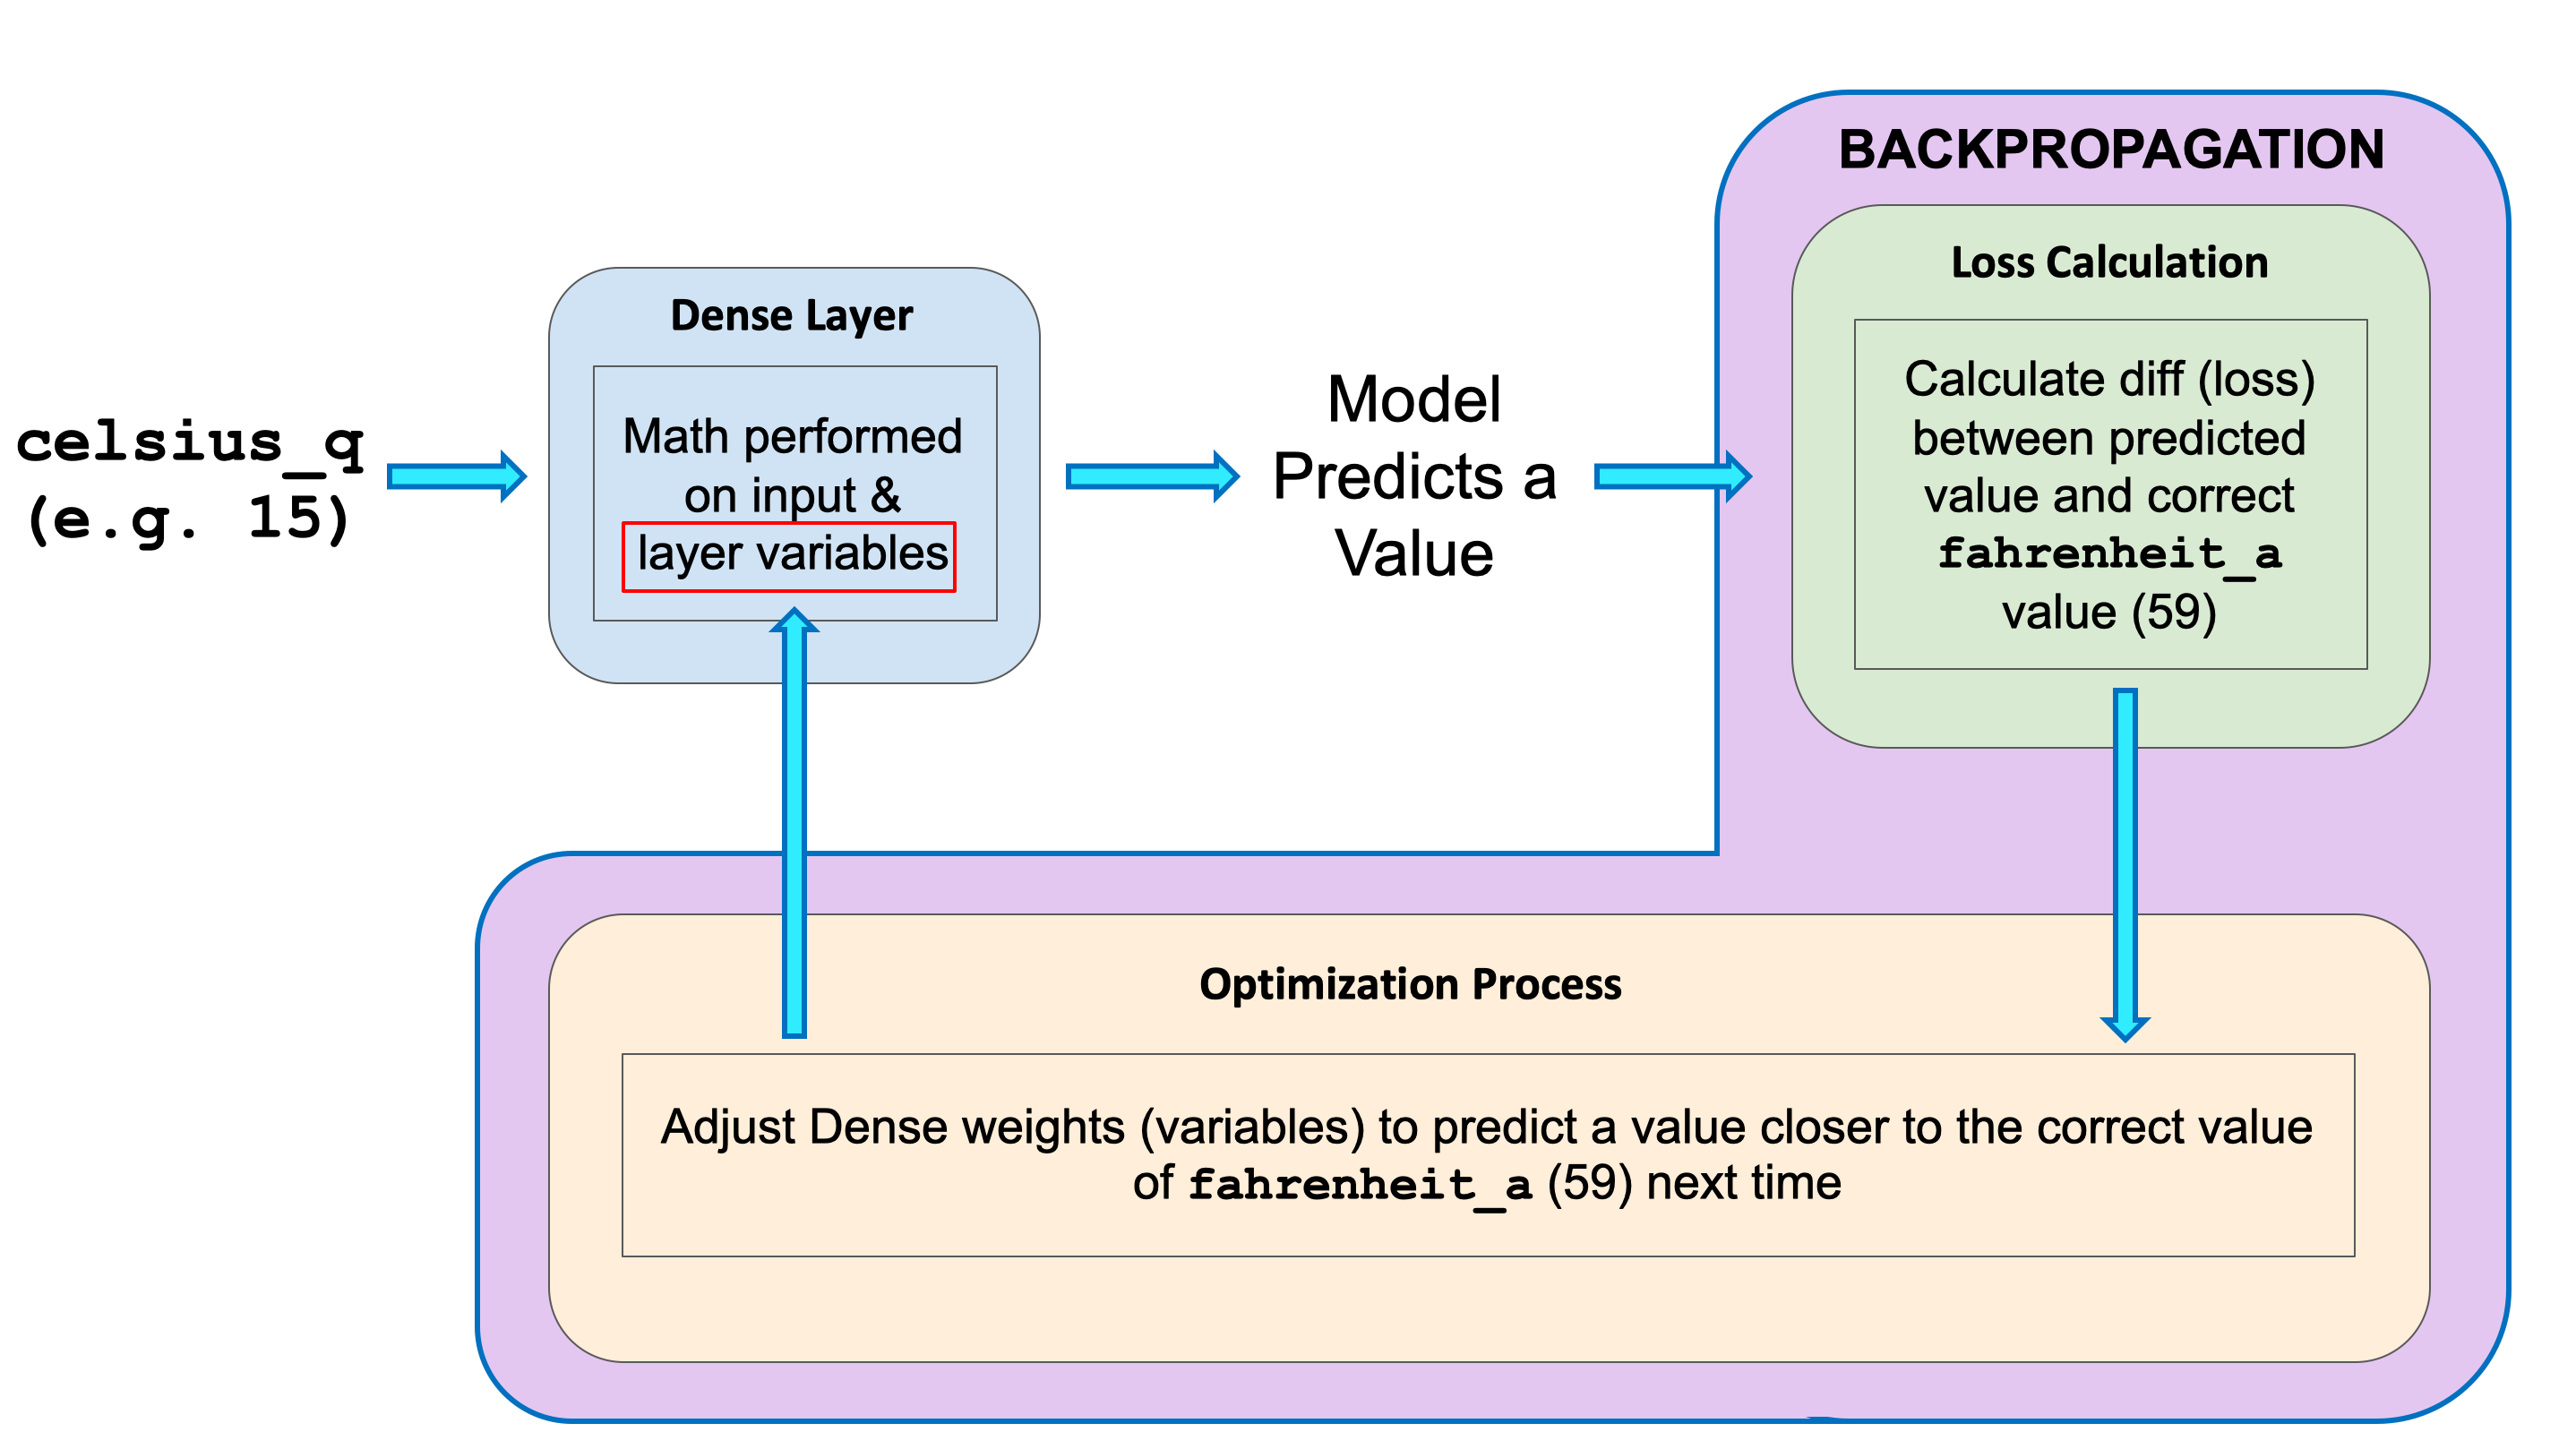